## Observations and Insights 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
#Three observations from the data:
# 1. Capomulin followed by Ramicane must have been the most popular by demand or most readily available since 
# those had the most data 
# 2. Infubinol had the only outlier within the data and was possibly present due to human error in the lab.
# 3. Capomulin looks to be an effective treatment since the tumor size decreased over time since the drug was induced.


In [74]:
# Checking the number of mice.
number_mice=combined_df["Mouse ID"].count()
number_mice

1893

In [75]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_mice=combined_df.groupby("Mouse ID")
duplicates=grouped_mice["Timepoint"].value_counts()
duplicates

Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
                      ..
z969      25           1
          30           1
          35           1
          40           1
          45           1
Name: Timepoint, Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df=combined_df.sort_values("Timepoint", ascending=False)
combined_df=combined_df.drop_duplicates(subset="Mouse ID", keep='first')
combined_df["Total mice"]=len(combined_df["Mouse ID"])

combined_df.index=range(0,len(combined_df))

In [79]:
# Checking the number of mice in the clean DataFrame.
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Total mice
0,z969,Naftisol,Male,9,30,45,73.867845,4,249
1,k483,Infubinol,Female,20,30,45,66.196912,3,249
2,k862,Stelasyn,Female,13,25,45,69.299149,4,249
3,a262,Placebo,Female,17,29,45,70.717621,4,249
4,k894,Zoniferol,Female,13,29,45,60.752704,4,249


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen=combined_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=grouped_regimen["Tumor Volume (mm3)"].mean()
median=grouped_regimen["Tumor Volume (mm3)"].median()
variance=grouped_regimen["Tumor Volume (mm3)"].var()
sd=grouped_regimen["Tumor Volume (mm3)"].std()
sem=grouped_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df=pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Variance in Tumor Volume": variance, "Standard Deviation": sd, "SEM": sem})
summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df.head()
# Using the aggregation method, produce the same summary statistics in a single line

#I tried!
#func_list=[mean, median, variance, sd, sem]
#summary_df.agg(func_list)

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

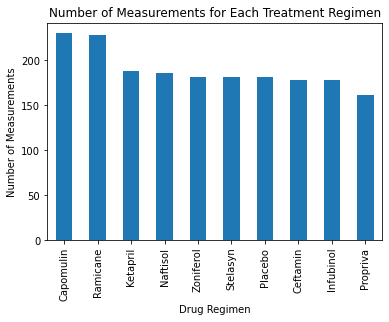

In [92]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements=combined_df["Drug Regimen"].value_counts()

measurements.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements for Each Treatment Regimen")

plt.show()

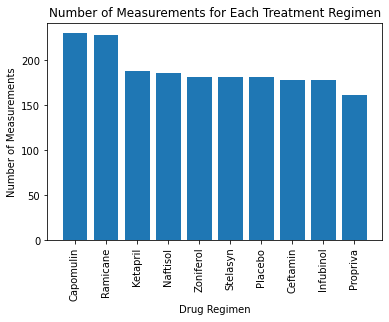

In [93]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements=combined_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(measurements))

plt.bar(x_axis, measurements)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, measurements.index.values)

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title('Number of Measurements for Each Treatment Regimen')

plt.show()

Text(0, 0.5, '')

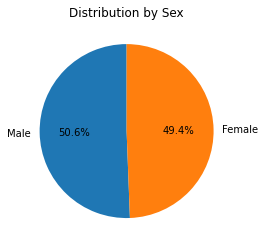

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_genders=combined_df["Sex"].value_counts()

pie_plot = mice_genders.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')
pie_plot.set_ylabel('')

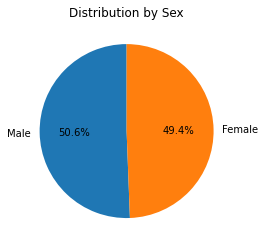

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_genders=combined_df["Sex"].value_counts()

plt.pie(mice_genders, labels=mice_genders.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(combined_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
max_tp_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_df, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [108]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in drugs:
    drug_name_df = merged_df.loc[merged_df["Drug Regimen"] == x]
    
    # add subset 
    final_volume_df = drug_name_df.loc[drug_name_df["Timepoint"] == drug_name_df["Max Timepoint"]]
    values = final_volume_df["Tumor Volume (mm3)"]
    drug_values.append(values)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {x}: {lower_bound}')
    print(f'Upper Bound for {x}: {upper_bound}')
    
    outliers_count = (values.loc[(final_volume_df["Tumor Volume (mm3)"] >= upper_bound) | 
                                        (final_volume_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f'Number of {x} outliers: {outliers_count}')

Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


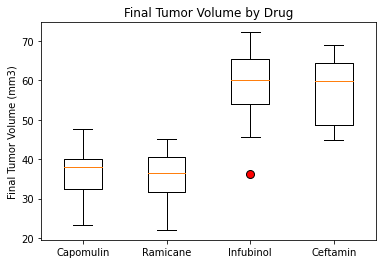

In [118]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

plt.boxplot(drug_values, flierprops=flierprops)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

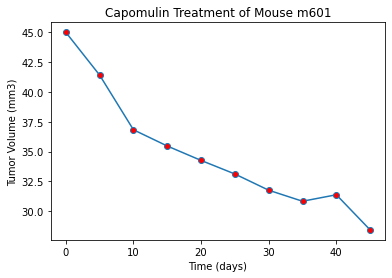

In [122]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

specific_mouse= combined_df.loc[combined_df["Mouse ID"]=="m601"]
plt.plot(specific_mouse['Timepoint'], specific_mouse['Tumor Volume (mm3)'], marker = 'o', markerfacecolor='r')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse m601")

# Display plot
plt.show()

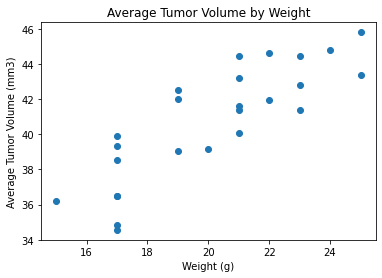

In [128]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin= combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]

# Find average tumor volume for each mouse
avg_vol_df = pd.DataFrame(Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Vol'})

avg_vol_df = pd.merge(Capomulin, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'Avg Tumor Vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Avg Tumor Vol']

plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


## Correlation and Regression

In [129]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin= combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]
avg_vol_df = pd.DataFrame(Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Vol'})
avg_vol_df = pd.merge(Capomulin, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'Avg Tumor Vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Avg Tumor Vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress (x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="pink")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()


The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


NameError: name 'linregress' is not defined